## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [12]:
import numpy as np
import matplotlib.pyplot as plt 
from math import sqrt
%matplotlib inline
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot X vs. y

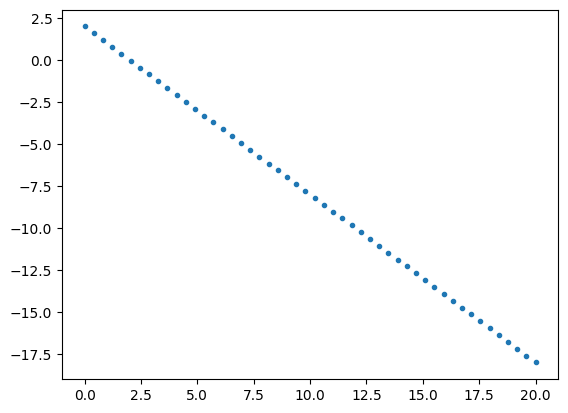

In [4]:
plt.plot(X,y,'.')

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

##### The following results uses alpha = 0.05, epsilon =  1e-08, and max. iterations = 500.

In [15]:
def Ada_Gd(X,y,alpha,e,loop):
    cost=[]
    theta0s=[]
    theta1s=[]
    y_preds=[]
    theta_0,theta_1,v0,v1=0,0,0,0
    y=np.array(y)
    X=np.array(X)
    for itr in range(0,loop):
        y_predictd=theta_0+X.dot(theta_1)
        loss = np.square(y_predictd-y)
        MSE = np.sum(loss)/(2*len(X))
        d_theta_0=(1/len(X))*np.sum((y_predictd-y))
        d_theta_1=(1/len(X))*np.sum(np.dot((y_predictd-y),X))
        Gradient_Vector=np.array([[d_theta_0],
                                  [d_theta_1]])
        if itr>=1 :
            if np.linalg.norm(Gradient_Vector)<0.001 or abs(MSE-cost[-1])<.001:
                break
        v0=v0+(d_theta_0)**2
        v1=v1+(d_theta_1)**2
        theta_0 =theta_0-((alpha/(sqrt(v0)+e))*d_theta_0)
        theta_1 =theta_1-((alpha/(sqrt(v1)+e))*d_theta_1)
        cost.append(MSE)
        theta0s.append(theta_0)
        theta1s.append(theta_1)    
        y_predictd=theta_0+X.dot(theta_1) 
        y_preds.append(y_predictd)
    print("Itrations per Epoch: ",itr,'\n')
    print("Grgint victor: ",Gradient_Vector,'\n')
    print("y_predict: ",y_predictd,"\n")
    print("y: ",y)
    print("Accuracy: ",r2_score(y,y_predictd),"\n")
    plt.plot(cost,".b-")
    plt.xlabel("Epoc", fontsize = 15)
    plt.ylabel("Cost",fontsize = 15)
    plt.show()
    plt.plot(theta0s,cost,".b-")
    plt.xlabel("Theta 0", fontsize = 15)
    plt.ylabel("Cost",fontsize = 15)
    plt.show()
    plt.plot(theta1s,cost,".b-")
    plt.xlabel("Theta 1", fontsize = 15)
    plt.ylabel("Cost",fontsize = 15)
    plt.show()
    plt.scatter(X,y)
    plt.plot(X,y_predictd,"r-")
    plt.xlabel("X", fontsize = 15)
    plt.ylabel("Y vs Y_hat",fontsize = 15)
    plt.show()
    plt.plot(theta0s,theta1s,".b-")
    plt.xlabel("Theta 0", fontsize = 15)
    plt.ylabel("Theta 1",fontsize = 15)
    plt.show()
    
    plt.scatter(X,y)
    for it in y_preds:
        plt.plot(X,it,'r')
        
        

Itrations per Epoch:  265 

Grgint victor:  [[-0.47229259]
 [ 2.64548541]] 

y_predict:  [ -0.5961288   -0.91760488  -1.23908095  -1.56055702  -1.8820331
  -2.20350917  -2.52498524  -2.84646131  -3.16793739  -3.48941346
  -3.81088953  -4.13236561  -4.45384168  -4.77531775  -5.09679383
  -5.4182699   -5.73974597  -6.06122205  -6.38269812  -6.70417419
  -7.02565026  -7.34712634  -7.66860241  -7.99007848  -8.31155456
  -8.63303063  -8.9545067   -9.27598278  -9.59745885  -9.91893492
 -10.24041099 -10.56188707 -10.88336314 -11.20483921 -11.52631529
 -11.84779136 -12.16926743 -12.49074351 -12.81221958 -13.13369565
 -13.45517173 -13.7766478  -14.09812387 -14.41959994 -14.74107602
 -15.06255209 -15.38402816 -15.70550424 -16.02698031 -16.34845638] 

y:  [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.346

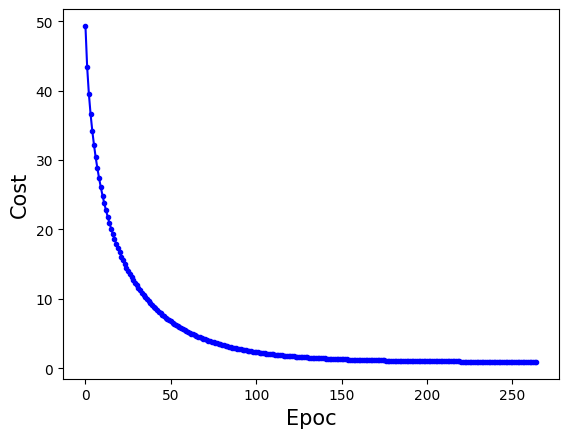

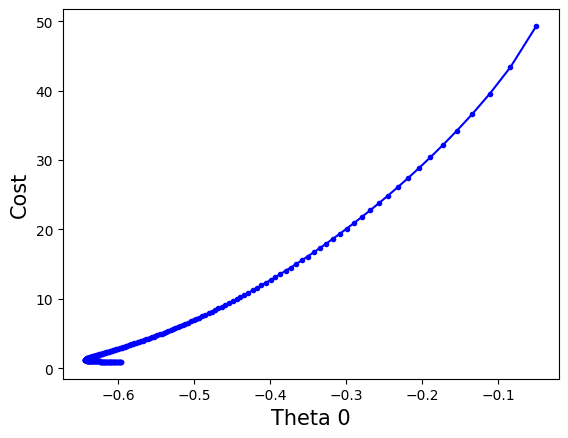

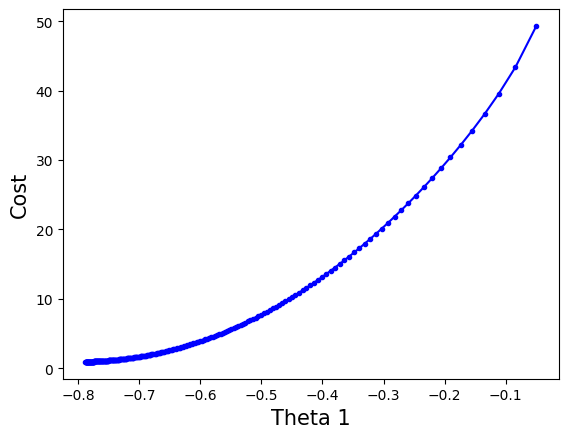

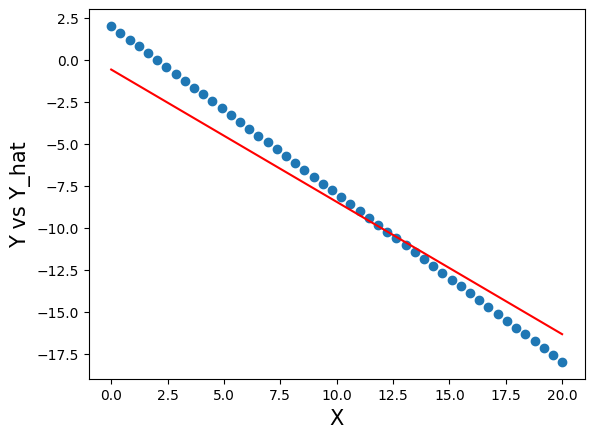

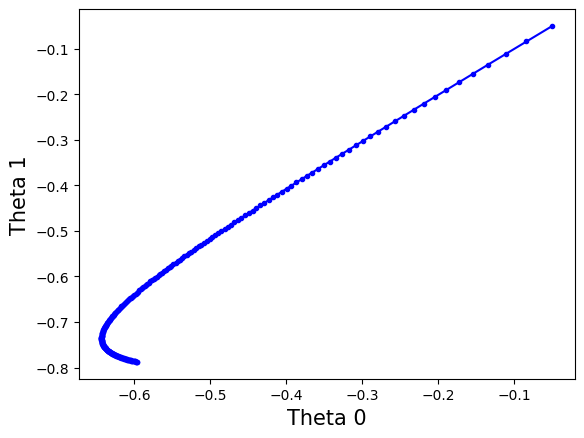

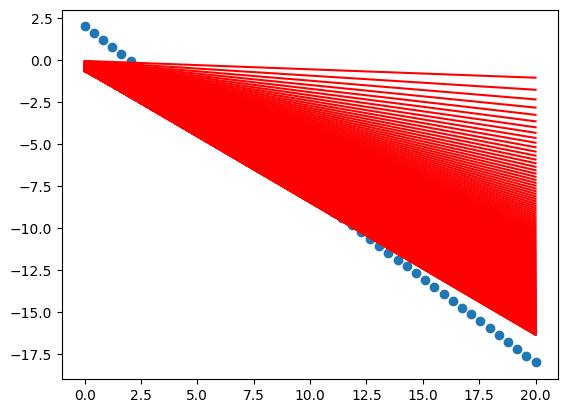

In [16]:
Ada_Gd(X,y,.05,1e-08,500)

## RMSProp

### Update the previos implementation to be RMSProp.


In [14]:
def RMS_Gd(X,y,alpha,b,e,loop):
    cost=[]
    theta0s=[]
    theta1s=[]
    y_preds=[]
    theta_0,theta_1,v0,v1=0,0,0,0
    y=np.array(y)
    X=np.array(X)
    for itr in range(0,loop):
        y_predictd=theta_0+X.dot(theta_1)
        loss = np.square(y_predictd-y)
        MSE = np.sum(loss)/(2*len(X))
        d_theta_0=(1/len(X))*np.sum((y_predictd-y))
        d_theta_1=(1/len(X))*np.sum(np.dot((y_predictd-y),X))
        Gradient_Vector=np.array([[d_theta_0],
                                  [d_theta_1]])
        if itr>=1 :
            if np.linalg.norm(Gradient_Vector)<0.001 or abs(MSE-cost[-1])<.001:
                break
        v0=b*v0+(1-b)*(d_theta_0)**2
        v1=b*v1+(1-b)*(d_theta_1)**2
        theta_0 =theta_0-((alpha/(sqrt(v0)+e))*d_theta_0)
        theta_1 =theta_1-((alpha/(sqrt(v1)+e))*d_theta_1)
        cost.append(MSE)
        theta0s.append(theta_0)
        theta1s.append(theta_1)    
        y_predictd=theta_0+X.dot(theta_1) 
        y_preds.append(y_predictd)
    print("Itrations per Epoch: ",itr,'\n')
    print("Grgint victor: ",Gradient_Vector,'\n')
    print("y_predict: ",y_predictd,"\n")
    print("y: ",y)
    print("Accuracy: ",r2_score(y,y_predictd),"\n")
    plt.plot(cost,".b-")
    plt.xlabel("Epoc", fontsize = 15)
    plt.ylabel("Cost",fontsize = 15)
    plt.show()
    plt.plot(theta0s,cost,".b-")
    plt.xlabel("Theta 0", fontsize = 15)
    plt.ylabel("Cost",fontsize = 15)
    plt.show()
    plt.plot(theta1s,cost,".b-")
    plt.xlabel("Theta 1", fontsize = 15)
    plt.ylabel("Cost",fontsize = 15)
    plt.show()
    plt.scatter(X,y)
    plt.plot(X,y_predictd,"r-")
    plt.xlabel("X", fontsize = 15)
    plt.ylabel("Y vs Y_hat",fontsize = 15)
    plt.show()
    plt.plot(theta0s,theta1s,".b-")
    plt.xlabel("Theta 0", fontsize = 15)
    plt.ylabel("Theta 1",fontsize = 15)
    plt.show()
    
    plt.scatter(X,y)
    for it in y_preds:
        plt.plot(X,it,'r')
        
        

##### The following results uses alpha = 0.05, beta = 0.9, epsilon =  1e-08, and max. iterations = 500.

Itrations per Epoch:  102 

Grgint victor:  [[-0.05015301]
 [ 0.3248034 ]] 

y_predict:  [  1.7116685    1.31322681   0.91478511   0.51634342   0.11790172
  -0.28053997  -0.67898167  -1.07742336  -1.47586506  -1.87430675
  -2.27274844  -2.67119014  -3.06963183  -3.46807353  -3.86651522
  -4.26495692  -4.66339861  -5.0618403   -5.460282    -5.85872369
  -6.25716539  -6.65560708  -7.05404878  -7.45249047  -7.85093217
  -8.24937386  -8.64781555  -9.04625725  -9.44469894  -9.84314064
 -10.24158233 -10.64002403 -11.03846572 -11.43690742 -11.83534911
 -12.2337908  -12.6322325  -13.03067419 -13.42911589 -13.82755758
 -14.22599928 -14.62444097 -15.02288267 -15.42132436 -15.81976605
 -16.21820775 -16.61664944 -17.01509114 -17.41353283 -17.81197453] 

y:  [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34

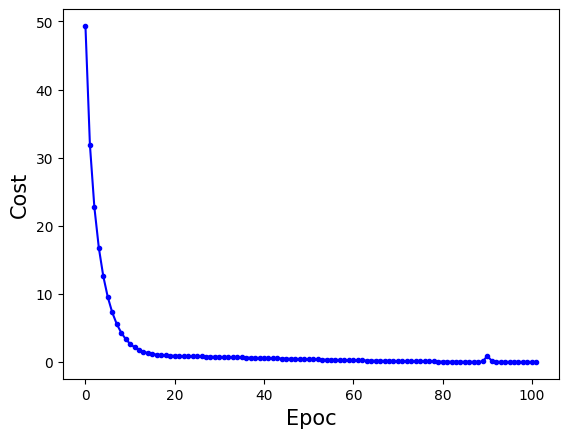

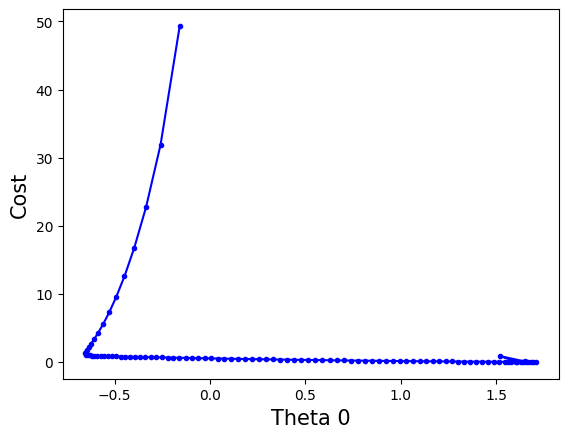

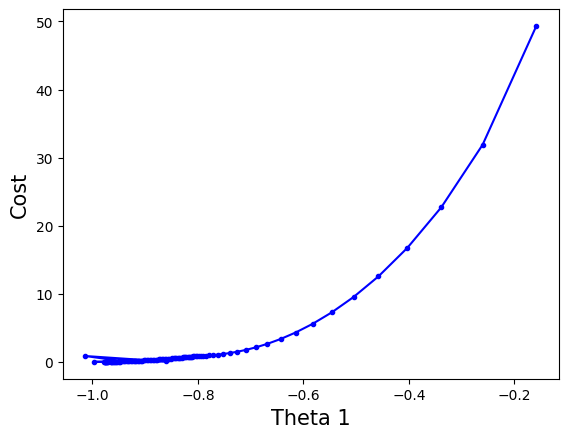

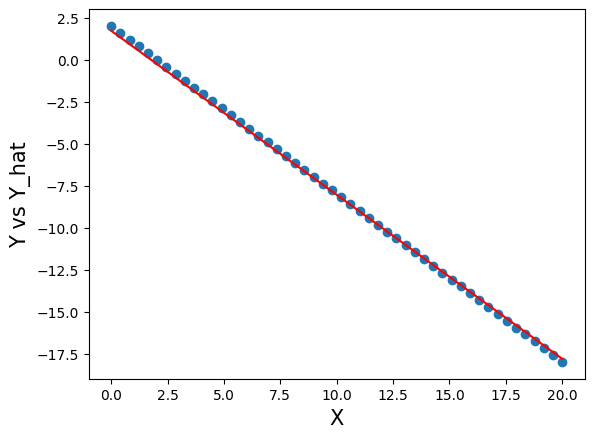

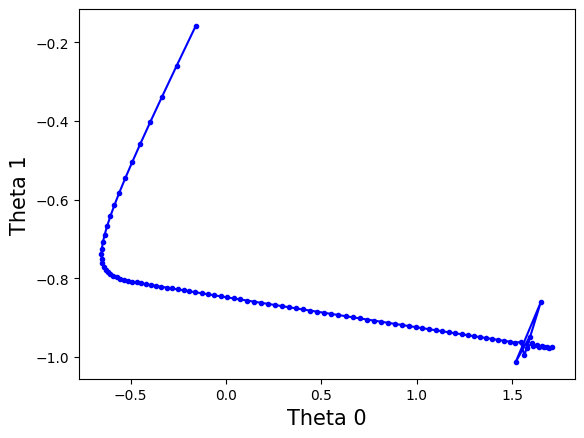

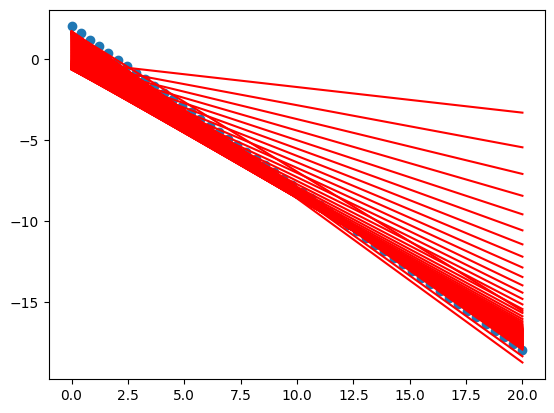

In [15]:
RMS_Gd(X,y,0.05,.9,1e-08,500)

##### The following results uses alpha = 0.005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

Itrations per Epoch:  539 

Grgint victor:  [[-0.18688672]
 [ 0.36359152]] 

y_predict:  [  1.16963989   0.78774084   0.4058418    0.02394275  -0.35795629
  -0.73985534  -1.12175438  -1.50365343  -1.88555247  -2.26745152
  -2.64935056  -3.03124961  -3.41314865  -3.7950477   -4.17694674
  -4.55884579  -4.94074483  -5.32264388  -5.70454292  -6.08644197
  -6.46834101  -6.85024006  -7.23213911  -7.61403815  -7.9959372
  -8.37783624  -8.75973529  -9.14163433  -9.52353338  -9.90543242
 -10.28733147 -10.66923051 -11.05112956 -11.4330286  -11.81492765
 -12.19682669 -12.57872574 -12.96062478 -13.34252383 -13.72442287
 -14.10632192 -14.48822096 -14.87012001 -15.25201906 -15.6339181
 -16.01581715 -16.39771619 -16.77961524 -17.16151428 -17.54341333] 

y:  [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.3469

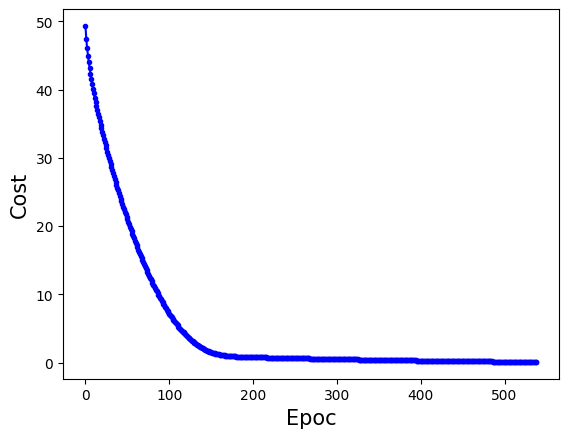

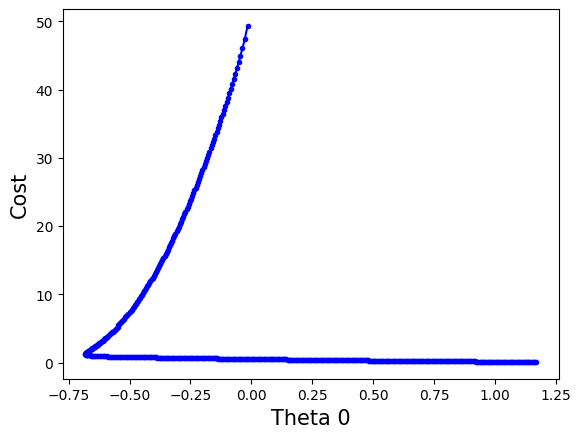

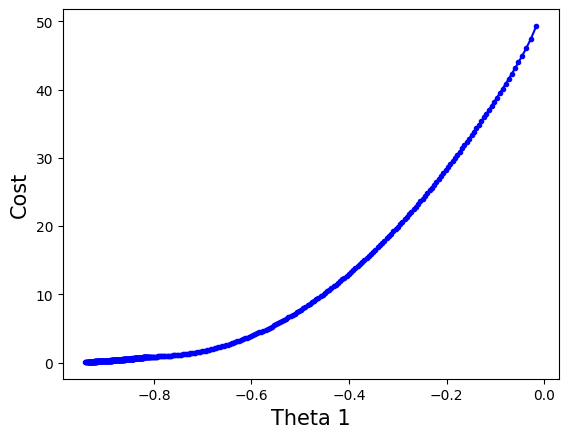

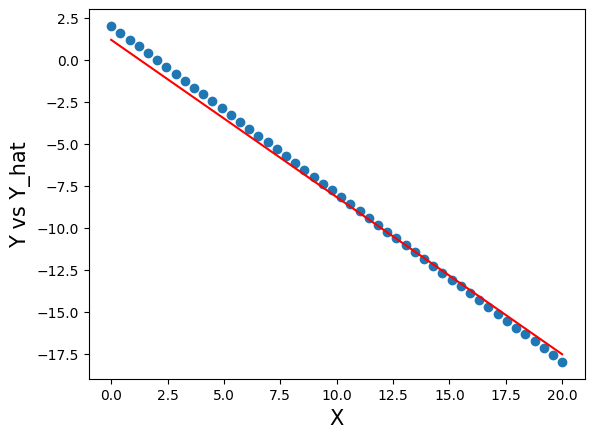

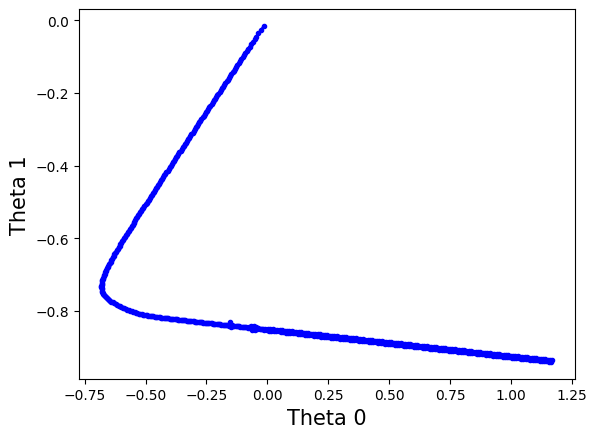

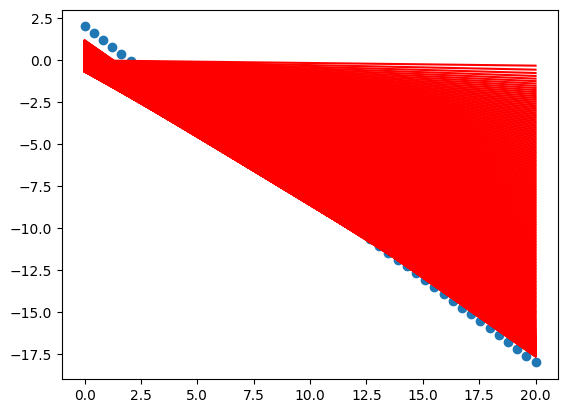

In [16]:
RMS_Gd(X,y,0.005,.9,1e-08,5000)

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

In [50]:
def Adam_Gd(X,y,alpha,b1,b2,e,loop):
    cost=[]
    theta0s=[]
    theta1s=[]
    y_preds=[]
    theta_0,theta_1,v0,v1=0,0,0,0
    m0,m0_hat,m1,m1_hat=0,0,0,0
    v0_hat,v1_hat=0,0
    y=np.array(y)
    X=np.array(X)
    for itr in range(0,loop):
        y_predictd=theta_0+X.dot(theta_1)
        loss = np.square(y_predictd-y)
        MSE = np.sum(loss)/(2*len(X))
        d_theta_0=(1/len(X))*np.sum((y_predictd-y))
        d_theta_1=(1/len(X))*np.sum(np.dot((y_predictd-y),X))
        Gradient_Vector=np.array([[d_theta_0],
                                  [d_theta_1]])
        if itr>=1 :
            if np.linalg.norm(Gradient_Vector)<0.001 or abs(MSE-cost[-1])<.001:
                break
        m0=(b1*m0)+((1-b1)*d_theta_0)
        m1=(b1*m1)+((1-b1)*d_theta_1)
        
        v0=(b2*v0)+((1-b2)*(d_theta_0)**2)
        v1=(b2*v1)+((1-b2)*(d_theta_1)**2)
        
        m0_hat=m0/(1-(b1)**(itr+1))
        m1_hat=m1/(1-(b1)**(itr+1))
        
        v0_hat=v0/(1-(b2)**(itr+1))
        v1_hat=v1/(1-(b2)**(itr+1))
        
        theta_0 =theta_0-((alpha/(sqrt(v0_hat)+e))*m0_hat)
        theta_1 =theta_1-((alpha/(sqrt(v1_hat)+e))*m1_hat)
        
        cost.append(MSE)
        theta0s.append(theta_0)
        theta1s.append(theta_1)    
        y_predictd=theta_0+X.dot(theta_1) 
        y_preds.append(y_predictd)
    print("Itrations per Epoch: ",itr+1,'\n')
    print("Grgint victor: ",Gradient_Vector,'\n')
    print("y_predict: ",y_predictd,"\n")
    print("y: ",y)
    print("Accuracy: ",r2_score(y,y_predictd),"\n")
    plt.plot(cost,".b-")
    plt.xlabel("Epoc", fontsize = 15)
    plt.ylabel("Cost",fontsize = 15)
    plt.show()
    plt.plot(theta0s,cost,".b-")
    plt.xlabel("Theta 0", fontsize = 15)
    plt.ylabel("Cost",fontsize = 15)
    plt.show()
    plt.plot(theta1s,cost,".b-")
    plt.xlabel("Theta 1", fontsize = 15)
    plt.ylabel("Cost",fontsize = 15)
    plt.show()
    plt.scatter(X,y)
    plt.plot(X,y_predictd,"r-")
    plt.xlabel("X", fontsize = 15)
    plt.ylabel("Y vs Y_hat",fontsize = 15)
    plt.show()
    plt.plot(theta0s,theta1s,".b-")
    plt.xlabel("Theta 0", fontsize = 15)
    plt.ylabel("Theta 1",fontsize = 15)
    plt.show()
    
    plt.scatter(X,y)
    for it in y_preds:
        plt.plot(X,it,'r')
        
        

##### The following results uses alpha = 0.05, beta1 = 0.05, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.

Itrations per Epoch:  55 

Grgint victor:  [[-0.07007312]
 [ 3.39704023]] 

y_predict:  [  0.74880453   0.38885034   0.02889615  -0.33105804  -0.69101223
  -1.05096642  -1.41092061  -1.7708748   -2.13082899  -2.49078318
  -2.85073737  -3.21069156  -3.57064575  -3.93059994  -4.29055413
  -4.65050832  -5.01046251  -5.3704167   -5.73037089  -6.09032508
  -6.45027927  -6.81023346  -7.17018765  -7.53014184  -7.89009603
  -8.25005022  -8.6100044   -8.96995859  -9.32991278  -9.68986697
 -10.04982116 -10.40977535 -10.76972954 -11.12968373 -11.48963792
 -11.84959211 -12.2095463  -12.56950049 -12.92945468 -13.28940887
 -13.64936306 -14.00931725 -14.36927144 -14.72922563 -15.08917982
 -15.44913401 -15.8090882  -16.16904239 -16.52899658 -16.88895077] 

y:  [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.346

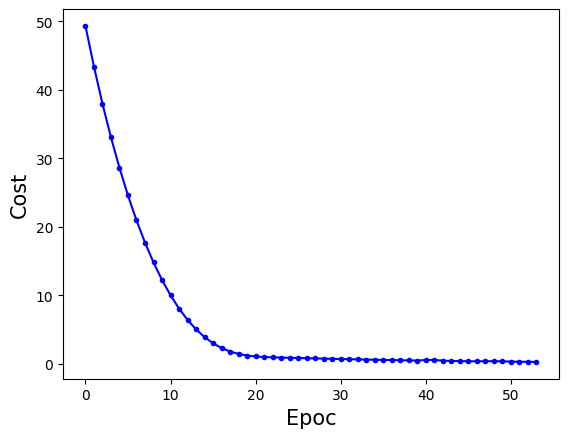

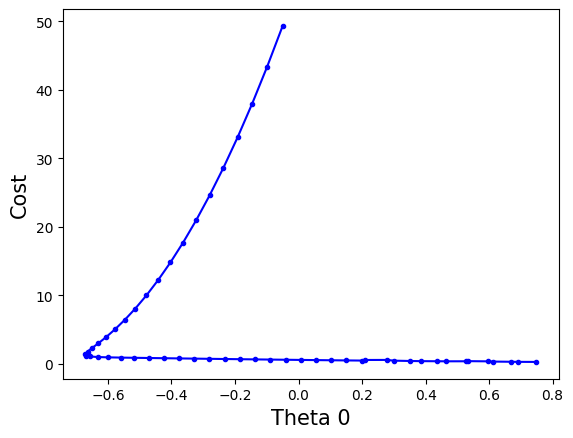

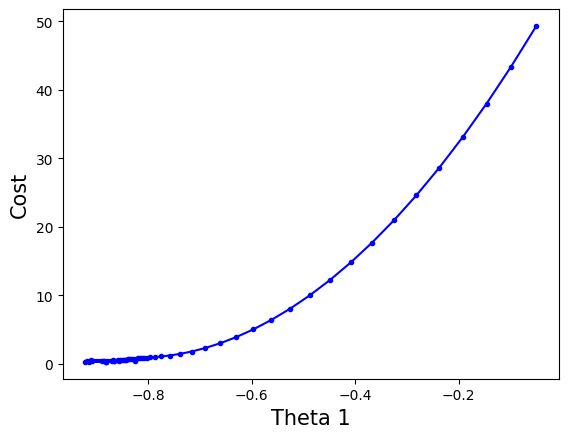

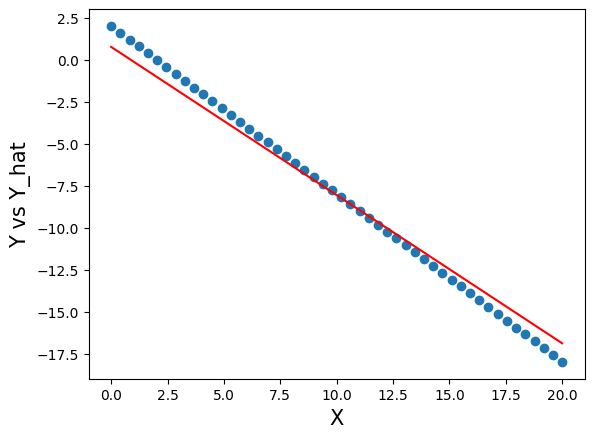

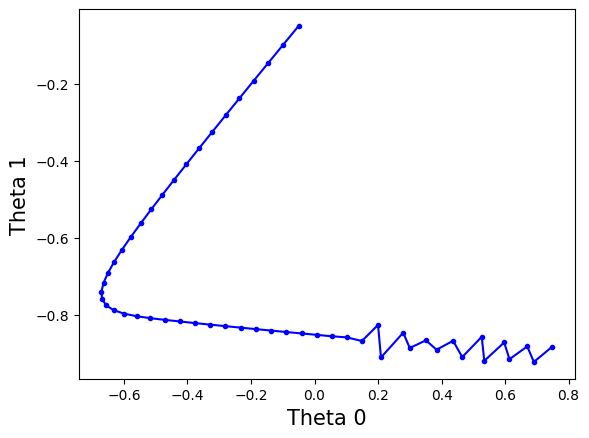

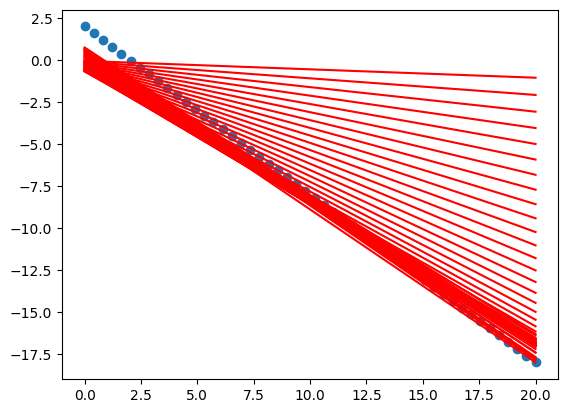

In [51]:
Adam_Gd(X,y,.05,.05,.7,1e-08,1000)

##### The following results uses alpha = 0.005, beta1 = 0.5, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 500.

Itrations per Epoch:  520 

Grgint victor:  [[-0.2036335 ]
 [ 0.37201574]] 

y_predict:  [  1.10219483   0.72236511   0.34253538  -0.03729435  -0.41712408
  -0.79695381  -1.17678353  -1.55661326  -1.93644299  -2.31627272
  -2.69610244  -3.07593217  -3.4557619   -3.83559163  -4.21542135
  -4.59525108  -4.97508081  -5.35491054  -5.73474027  -6.11456999
  -6.49439972  -6.87422945  -7.25405918  -7.6338889   -8.01371863
  -8.39354836  -8.77337809  -9.15320781  -9.53303754  -9.91286727
 -10.292697   -10.67252673 -11.05235645 -11.43218618 -11.81201591
 -12.19184564 -12.57167536 -12.95150509 -13.33133482 -13.71116455
 -14.09099427 -14.470824   -14.85065373 -15.23048346 -15.61031319
 -15.99014291 -16.36997264 -16.74980237 -17.1296321  -17.50946182] 

y:  [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34

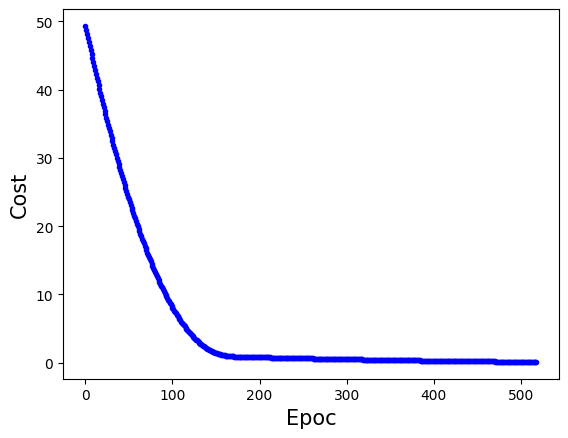

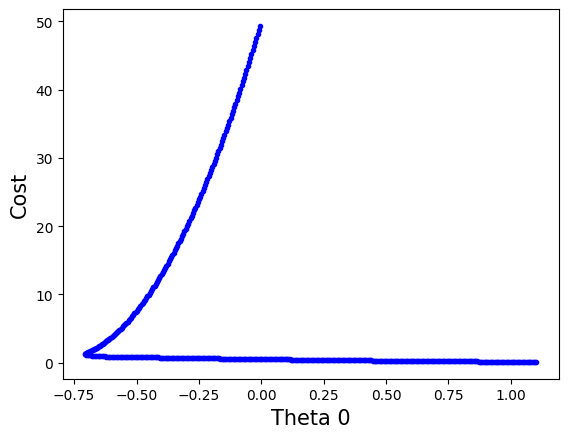

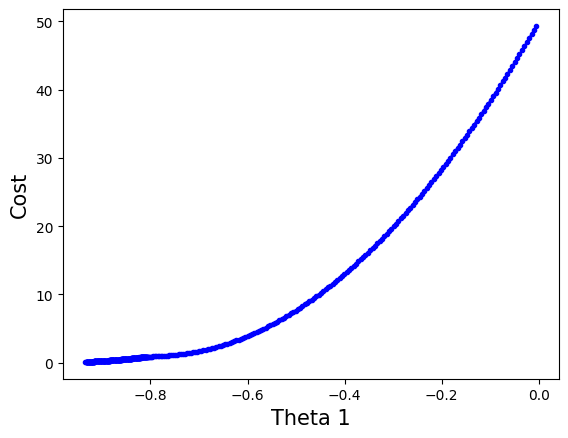

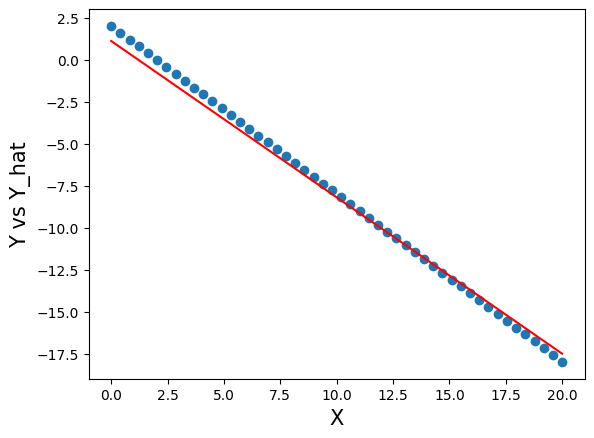

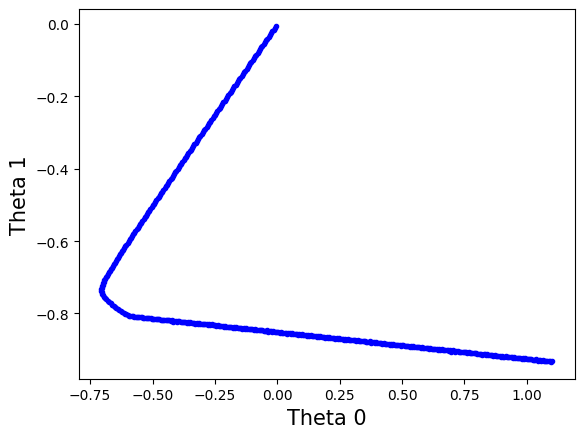

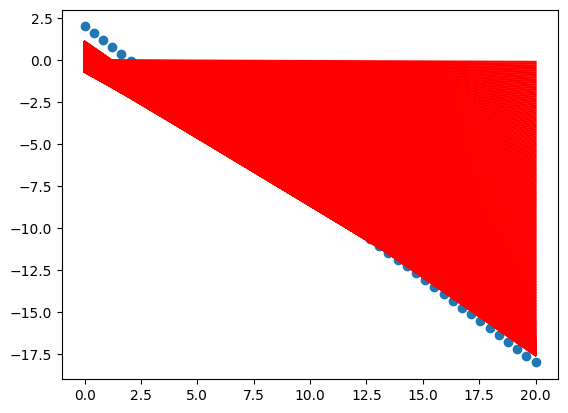

In [52]:
Adam_Gd(X,y,.005,.5,.8,1e-08,1000)

Itrations per Epoch:  1585 

Grgint victor:  [[-0.58535754]
 [ 1.36934827]] 

y_predict:  [ -0.66725908  -0.99044677  -1.31363446  -1.63682215  -1.96000985
  -2.28319754  -2.60638523  -2.92957292  -3.25276062  -3.57594831
  -3.899136    -4.22232369  -4.54551139  -4.86869908  -5.19188677
  -5.51507446  -5.83826216  -6.16144985  -6.48463754  -6.80782523
  -7.13101293  -7.45420062  -7.77738831  -8.100576    -8.4237637
  -8.74695139  -9.07013908  -9.39332677  -9.71651447 -10.03970216
 -10.36288985 -10.68607754 -11.00926524 -11.33245293 -11.65564062
 -11.97882831 -12.30201601 -12.6252037  -12.94839139 -13.27157908
 -13.59476678 -13.91795447 -14.24114216 -14.56432985 -14.88751755
 -15.21070524 -15.53389293 -15.85708062 -16.18026832 -16.50345601] 

y:  [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34

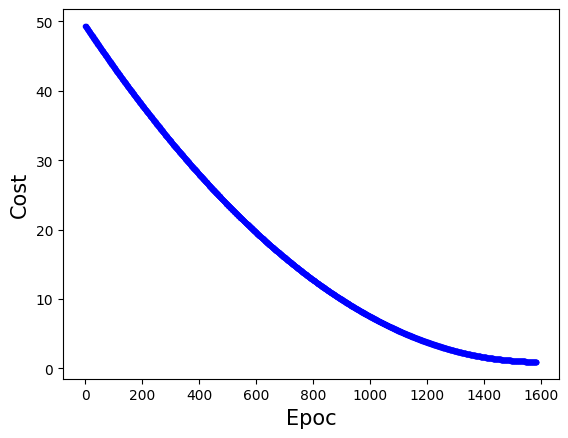

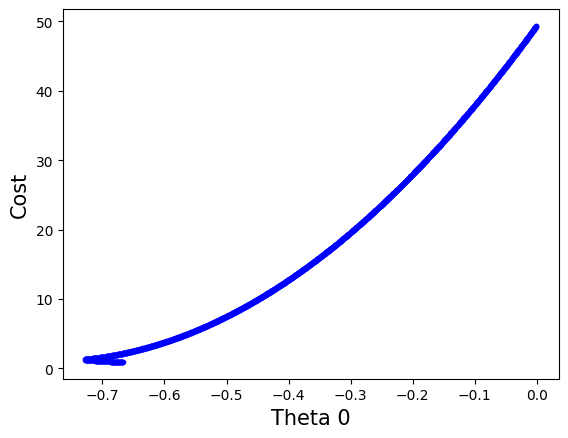

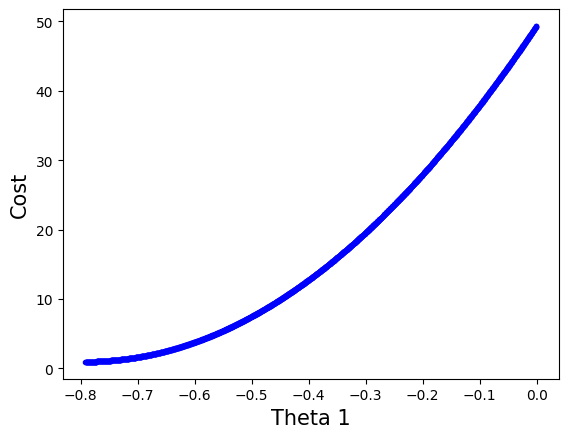

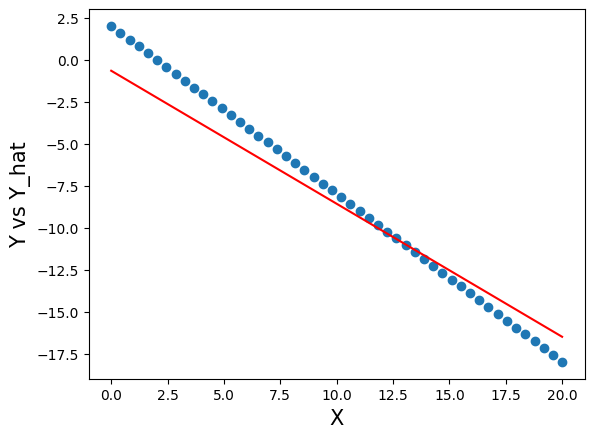

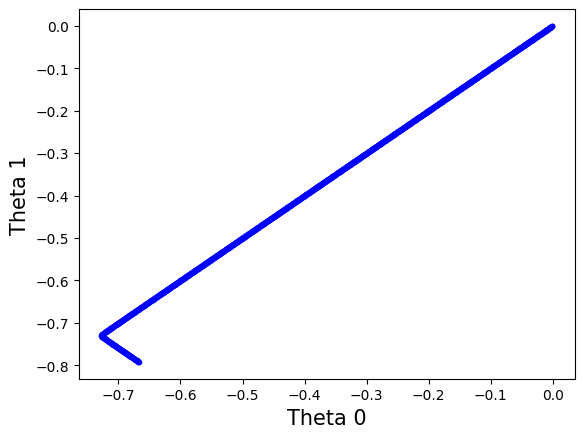

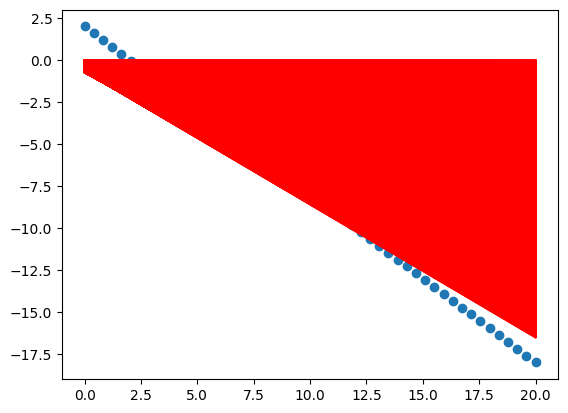

In [53]:
Adam_Gd(X,y,.0005,.8,.8,1e-08,5000)

## Congratulations 
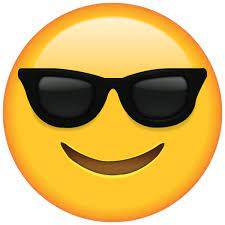